In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("./dataset/DM1_game_dataset.csv")
df_to_be_modified = pd.read_csv("./dataset/DM1_game_dataset.csv")

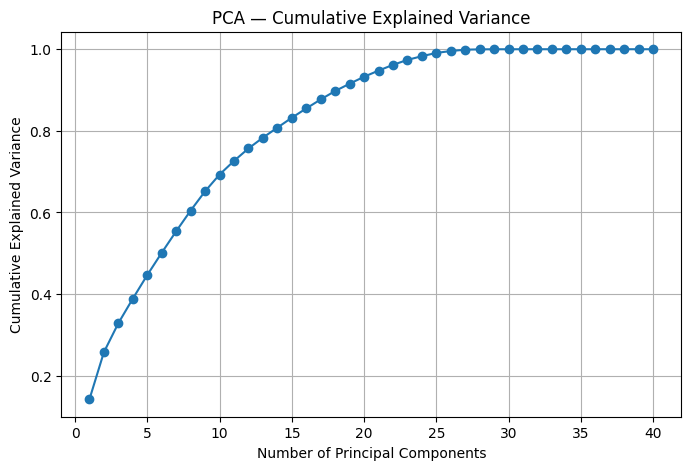

PC1: 14.23% variance (14.23% cumulative)
PC2: 11.53% variance (25.76% cumulative)
PC3: 7.11% variance (32.87% cumulative)
PC4: 6.01% variance (38.88% cumulative)
PC5: 5.78% variance (44.66% cumulative)
PC6: 5.46% variance (50.12% cumulative)
PC7: 5.27% variance (55.39% cumulative)
PC8: 5.06% variance (60.45% cumulative)
PC9: 4.73% variance (65.19% cumulative)
PC10: 4.10% variance (69.28% cumulative)
PC11: 3.34% variance (72.63% cumulative)
PC12: 3.05% variance (75.68% cumulative)
PC13: 2.65% variance (78.33% cumulative)
PC14: 2.45% variance (80.78% cumulative)
PC15: 2.43% variance (83.20% cumulative)
PC16: 2.28% variance (85.49% cumulative)
PC17: 2.20% variance (87.69% cumulative)
PC18: 2.07% variance (89.76% cumulative)
PC19: 1.78% variance (91.54% cumulative)
PC20: 1.71% variance (93.25% cumulative)
PC21: 1.50% variance (94.75% cumulative)
PC22: 1.41% variance (96.17% cumulative)
PC23: 1.22% variance (97.39% cumulative)
PC24: 0.91% variance (98.29% cumulative)
PC25: 0.80% variance (9

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Select only numeric columns
df_num = df.select_dtypes(include=['float64', 'int64']).dropna()

#Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_num)

# Apply PCA
pca = PCA()
pca.fit(X_scaled)

#Explained variance ratio (each component)
explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

#Plot cumulative variance
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_var)+1), cumulative_var, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA — Cumulative Explained Variance')
plt.grid(True)
plt.show()

#Print results
for i, (ev, cv) in enumerate(zip(explained_var, cumulative_var), start=1):
    print(f"PC{i}: {ev*100:.2f}% variance ({cv*100:.2f}% cumulative)")

#Find number of components needed for 95% variance
n_components_95 = np.argmax(cumulative_var >= 0.95) + 1
print(f"\n✅ {n_components_95} components explain 95% of the total variance.")


## 1. Deleting the numcomments

In [18]:
df_to_be_modified = df_to_be_modified.drop(labels = "NumComments", axis = 1)

## 2. Understanding commaxplaytime and mfgplaytime

In [19]:
df_to_be_modified[df_to_be_modified["MfgPlaytime"] == df_to_be_modified["ComMaxPlaytime"]]["BGGId"].count()

np.int64(21925)

In [20]:
df_to_be_modified["ComMaxPlaytime"].sort_values(ascending = False)[0:10]

4349     60000
19044    22500
1713     17280
15642    14400
8120     12000
18374    12000
8052     10000
2059      8640
14258     7920
3497      6000
Name: ComMaxPlaytime, dtype: int64

In [21]:
df_to_be_modified["ComMaxPlaytime"].mean()

np.float64(90.51352337514253)

In [22]:
df_to_be_modified["ComMaxPlaytime"].median()

np.float64(45.0)

In [23]:
# Decided to drop ComMaxPlaytime due to high number of missing values and inconsistencies with MfgPlaytime
df_to_be_modified = df_to_be_modified.drop(labels = "ComMaxPlaytime", axis = 1)

## 3. Correction of IsReimplementation 

In [24]:
# Fixing IsReimplementation based on NumImplementations
df_to_be_modified.loc[(df_to_be_modified["IsReimplementation"] == 0) & (df_to_be_modified["NumImplementations"] > 0), "IsReimplementation"] = 1

In [25]:
df_to_be_modified[(df_to_be_modified["IsReimplementation"] == 0) & (df_to_be_modified["NumImplementations"] > 0)]

,BGGId,Name,Description,YearPublished,GameWeight,ComWeight,MinPlayers,MaxPlayers,ComAgeRec,LanguageEase,...,Rank:childrensgames,Cat:Thematic,Cat:Strategy,Cat:War,Cat:Family,Cat:CGS,Cat:Abstract,Cat:Party,Cat:Childrens,Rating


## 4. Deleting Comweight because it's Gameweight + random noise

In [26]:
# weighted comweight
df_to_be_modified = df_to_be_modified.drop(labels = "ComWeight", axis = 1)

## 5. Deleting BestPlayers due to the high number of missing values

In [27]:
df_to_be_modified = df_to_be_modified.drop(labels = "BestPlayers", axis = 1)